# 問題例の作成

In [3]:
class Timewindow():
    def __init__(self, e, l):
        self.e = e
        self.l = l

In [4]:
class Coordinate():
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [5]:
class Customer():
    def __init__(self, d, tw, coo, penalty, reward):
        self.demand = d
        self.tw = Timewindow(*tw)
        self.coordinate = Coordinate(*coo)
        self.penalty = penalty
        self.reward = reward

In [6]:
class Vehicle():
    def __init__(self, c, tour):
        self.capacity = c
        self.tour = tour

In [7]:
class piecewise_func():
    def __init__(self, e, l, interception, slope):
        self.e, self.l = e, l
        self.linear_func = lambda x : interception-(x-e)*slope
    def val(self, x):
        if x < self.e or self.l < x:
            return 0
        elif self.e <= x <= self.l:
            return self.linear_func(x)

In [8]:
class Reward_func():
    def __init__(self, interception, slope):
        self.interception = interception
        self.slope = slope

In [9]:
def ex():
    """
    V : 客集合
        N : 客数
        d : 需要
        tw : 時間枠
        (x, y) : 座標
        penalty : 時間枠を違反した場合にかかる、単位時間あたりの違反料
    K : 車両集合
        c : 容料
        #loading : 現在積んでいる荷物の量
        tour : 巡回路
    """
    import random
    random.seed(0)
    N = 1024 #random.randint(5, 10)
    max_d = N #10
    max_tw = N*10 #50
    max_co = N*0.2 #10
    max_slope = 3
    max_interception = 5
    V = {}
    sum_d = 0
    V[0] = Customer(0, [0,max_tw], (0,0), 0, piecewise_func(*(0, max_tw), *(0,0)))
    for i in range(1, N+1):
        d = random.uniform(-max_d, max_d)
        tw = sorted([random.uniform(0, max_tw) for i in range(2)])
        x, y = random.uniform(-max_co, max_co), random.uniform(-max_co, max_co)
        penalty = random.uniform(1, 10)
        slope = (-1)*random.uniform(0, max_slope)
        interception = random.uniform(0, max_interception) + (tw[1]-tw[0])*(-slope)
        reward = Reward_func(interception, slope)#piecewise_func(*tw, interception, slope)
        V[i] = Customer(d, tw, (x, y), penalty, reward)
        sum_d += d*(d>0)
        
    K = {}
    min_cap = max_d*0.8
    max_cap = max_d*2
    """
    M = 2 # random.randint(N//2, N*2)
    for k in range(M):
        c = random.uniform(min_cap, max_cap)
        K[k] = Vehicle(c, [])
    """
    sum_cap = 0
    i = 0
    while sum_cap<sum_d*3:
        c = random.uniform(min_cap, max_cap)
        K[i] = Vehicle(c, {})
        sum_cap += c
        i += 1
    #"""
    return V, K

In [10]:
def ex_small():
    """
    V : 客集合
        N : 客数
        d : 需要
        tw : 時間枠
        (x, y) : 座標
        penalty : 時間枠を違反した場合にかかる、単位時間あたりの違反料
    K : 車両集合
        c : 容料
        tour : 巡回路
    """
    import random
    random.seed(0)
    N = 5
    V = {}
    d_list = [0,1,-2,3,-4,5]
    tw_list = [(0,10),(0,10),(1,6),(2,8),(3,7),(4,7)]
    coo_list = [(0,0) for i in range(5+1)]#[(0,0),(0,2),(1,3),(2,6),(3,3),(4,10)]
    penalty_list = [0,10,10,10,20,20]
    linearfunc_list = [(0,0),(1,0),(2,0),(3,0),(4,0),(5,0)]
    V[0] = Customer(d_list[0], tw_list[0], coo_list[0], penalty_list[0], piecewise_func(*tw_list[0], *linearfunc_list[0]))
    for i in range(1,N+1):
        d = d_list[i]
        tw = tw_list[i]
        x, y = coo_list[i]
        penalty = penalty_list[i]
        reward = Reward_func(*linearfunc_list[i])#piecewise_func(*tw, *linearfunc_list[i])
        V[i] = Customer(d, tw, (x, y), penalty, reward)
        
    M = 3
    c_list = [2,4,6]
    K = {k:Vehicle(c_list[k], {}) for k in range(M)}
    K[0].tour = [0,1]
    K[1].tour = [0,2,3]
    K[2].tour = [0,4,5]
    
    return V, K

In [864]:
V, K = ex()

In [865]:
for i in V:
    print(i, end="\t")
    for condition in V[i].__dict__.values():
        print(condition, end="\n\t")
    print()

0	0
	0
	
1	705.3759519232985
	4.644407237053729
	
2	-47.9294378959753
	7.802237837415015
	
3	839.1603322229557
	7.568485734341158
	
4	-57.051718752843044
	9.699457309936829
	
5	-490.5117483172671
	4.589411880018419
	
6	-1021.6595060440509
	8.83424108897789
	
7	-535.3145781960291
	3.8804914420529117
	
8	-800.6495315330997
	5.862552462732916
	
9	179.43974743129365
	3.612965521624822
	
10	230.9594723709065
	8.890933337404974
	
11	815.4585525409361
	3.4807070918091445
	
12	809.0398052898308
	6.942208407601501
	
13	600.7297722986991
	8.605698181043637
	
14	-784.1089675089552
	1.9054676819448657
	
15	-931.3606290112259
	1.2402711519598468
	
16	155.55163756859542
	1.1947285886952166
	
17	-770.2627032587638
	4.8305694877013545
	
18	-571.7416523441821
	1.3544083637622313
	
19	-615.719341123455
	2.524821454877209
	
20	-905.1116670433307
	6.3711225412246995
	
21	-58.11114988280224
	4.2143651433123654
	
22	124.10924821201706
	3.5279484779651344
	
23	-302.6420500162408
	6.589691610568005
	
24	-175.

	7.652881213236558
	
306	-368.24239069405576
	9.952318054860388
	
307	462.1459615729307
	6.950904767182179
	
308	-21.956354523877735
	2.9043935541135686
	
309	852.1123634174846
	5.231769816250219
	
310	873.9374709857661
	7.152288282188482
	
311	-491.4307443675955
	6.627732240391904
	
312	466.4406246895305
	1.1184198784699015
	
313	546.635068845045
	8.390847029748276
	
314	-451.71008155120967
	9.927605035703886
	
315	981.256491874839
	1.1995524604204997
	
316	565.5532240165142
	3.877105159809759
	
317	-162.13793062987156
	6.902039571102531
	
318	-413.20577858067827
	9.129455722680069
	
319	-102.52362020471719
	3.5680805861467926
	
320	227.92005680777197
	1.9627908509815137
	
321	-31.135698238956365
	9.554381205600324
	
322	-329.95663052804593
	3.791230707640892
	
323	-347.292596278317
	7.8506044781892435
	
324	383.42318478148286
	9.878090253399114
	
325	-827.2686154853357
	3.1369919221085323
	
326	-906.6733447980891
	6.0211223439803465
	
327	-728.1697387463157
	4.370374522609814
	
328	9

536	948.1182819063861
	4.42537023052871
	
537	676.5825074414586
	9.485824255685111
	
538	601.4160837528002
	8.768491965499281
	
539	367.91436915193435
	3.384549126607291
	
540	212.73819218194512
	7.493998195367758
	
541	330.1187584252584
	6.547579980462245
	
542	736.0442005165321
	5.3781447799570685
	
543	246.2739745116519
	3.714272056183553
	
544	629.9191530751939
	1.0830251998807703
	
545	744.4219408173337
	3.3301871186897505
	
546	-101.9254309263863
	5.641470103356557
	
547	434.167417131549
	7.637478890837439
	
548	1003.1483959814682
	8.52155108914245
	
549	-977.0656512751225
	2.587505896877
	
550	839.7186234191652
	5.787556314532265
	
551	148.1245692254463
	9.582980986861807
	
552	-346.0917664462354
	8.41211896834007
	
553	-331.86017738577243
	5.568763381770907
	
554	801.2268208558055
	6.181476611157111
	
555	-872.2601509525168
	2.6615165298860273
	
556	-319.06238669226104
	5.914687546136436
	
557	-637.9319219928261
	5.000443984864524
	
558	-744.5537940395202
	3.386736471179371
	
5

	
767	787.615980944691
	6.685317544934597
	
768	816.9107315629678
	4.461925713813576
	
769	541.3577364789874
	6.487400453454563
	
770	714.5582718243154
	9.484132592325194
	
771	668.5032168655353
	4.645829846459222
	
772	896.7042118005697
	5.73804940523075
	
773	837.6371764957164
	3.543493396486139
	
774	-877.9758444049346
	7.6954771443603995
	
775	145.9421873474564
	1.2939287362251513
	
776	-851.5404903423414
	4.161381771332286
	
777	-55.08458282566221
	9.553142604072457
	
778	211.57599448531073
	7.402293917023576
	
779	665.9853197171687
	6.041536644644307
	
780	162.1061457197709
	7.338772697381816
	
781	-262.8157011925605
	3.093026632340053
	
782	-701.349811771282
	3.147081825278205
	
783	-177.95473240402134
	8.410415508506787
	
784	-372.7326863917938
	3.612500896219541
	
785	906.5936286216931
	4.813484058169108
	
786	662.6982067068097
	6.385204682946467
	
787	679.4835031446473
	4.62928511754661
	
788	-920.3357875409993
	7.322627821731961
	
789	945.3819481311616
	7.639304076081954
	
7

	7.882839795479636
	
998	742.1000410714739
	9.32843048306865
	
999	-334.93662448766236
	1.8713049931928019
	
1000	-336.0176793368439
	3.776587762648777
	
1001	-906.6516186203578
	7.010212088915685
	
1002	-431.0171267168578
	6.190752268414981
	
1003	-459.6316820700954
	1.0943555585763147
	
1004	440.2843008691498
	6.1363820230104835
	
1005	-323.4556709883914
	7.713384741117786
	
1006	-752.8854698795692
	7.725877263060696
	
1007	-158.17406744648952
	8.487095704543105
	
1008	-621.5619334874527
	7.0885631892719445
	
1009	265.30774664129376
	3.503225973172297
	
1010	-572.4618136917957
	1.1518417856661873
	
1011	693.2325801812053
	2.113907443563305
	
1012	533.4046390586423
	8.871504695317995
	
1013	-687.2434081436268
	3.7467227960088074
	
1014	-354.8969805852362
	3.9076834833008167
	
1015	-40.34025706752573
	6.166340351882789
	
1016	-468.9452027062582
	5.454288988018219
	
1017	-967.4393937649463
	5.990586831029848
	
1018	885.9497459396769
	5.16125511877243
	
1019	-690.006712859431
	8.54799470

In [866]:
for k in K:
    print(k, end="\t")
    for condition in K[k].__dict__.values():
        print(condition, end="\n\t")
    print()

0	1541.7587602442413
	{}
	
1	880.3067140431698
	{}
	
2	1463.6636249695448
	{}
	
3	1421.3465463357006
	{}
	
4	1531.2688427509524
	{}
	
5	1965.2590026427335
	{}
	
6	1661.1434685188929
	{}
	
7	1222.1131087452018
	{}
	
8	1406.4530592637984
	{}
	
9	1442.8746232201668
	{}
	
10	1956.3478255110376
	{}
	
11	1607.418614186681
	{}
	
12	1246.1630352948084
	{}
	
13	1909.8093683007717
	{}
	
14	873.539209191551
	{}
	
15	1029.7143221425279
	{}
	
16	1161.6487122861422
	{}
	
17	1994.2456346159938
	{}
	
18	1896.1551239574317
	{}
	
19	1119.8379785166114
	{}
	
20	1536.9863227533797
	{}
	
21	1172.661089905031
	{}
	
22	1968.9622252031834
	{}
	
23	1585.1693696625637
	{}
	
24	1714.6332549186104
	{}
	
25	1963.49802072048
	{}
	
26	1809.6799587428918
	{}
	
27	1960.262650656329
	{}
	
28	1005.2834290831772
	{}
	
29	1137.9494158498717
	{}
	
30	1889.6660096701555
	{}
	
31	1859.2365035063735
	{}
	
32	1762.711630016666
	{}
	
33	1703.277514265522
	{}
	
34	1869.352854165993
	{}
	
35	1403.0152344493536
	{}
	
36	942.515173

	{}
	
376	1444.2489536467635
	{}
	
377	1650.8984450003709
	{}
	
378	1525.480456367818
	{}
	
379	1439.9318855647575
	{}
	
380	926.1942488485194
	{}
	
381	1292.901203062472
	{}
	
382	1301.5787052130088
	{}
	
383	1381.8428008640103
	{}
	
384	1834.1485740613339
	{}
	
385	1186.977856874676
	{}
	
386	952.124830729971
	{}
	
387	1069.58327813599
	{}
	
388	1503.8868318566742
	{}
	
389	1313.848095238273
	{}
	
390	2011.110223165041
	{}
	
391	976.4905247231266
	{}
	
392	1453.3727804661248
	{}
	
393	1809.0317421155432
	{}
	
394	1171.4605197839487
	{}
	
395	1916.5911066918682
	{}
	
396	1834.4737809794424
	{}
	
397	1335.0695238365456
	{}
	
398	1754.1188063369802
	{}
	
399	1345.2614830974235
	{}
	
400	1781.5747111688524
	{}
	
401	1234.4869811035132
	{}
	
402	1513.4465089423697
	{}
	
403	1321.0186923341234
	{}
	
404	1172.0428612492894
	{}
	
405	1377.4981477902375
	{}
	
406	1329.9004051193015
	{}
	
407	1701.0884792082288
	{}
	
408	1107.5919476222127
	{}
	
409	1981.0413065986559
	{}
	
410	1740.1772239307

In [867]:
sum(i.demand for i in V.values())

-6026.978423399211

In [868]:
sum(i.capacity for i in K.values())

768446.5016205861

# 問題を解く

## 巡回路を生成  
先生のソルバーを使う

In [11]:
V, K = ex_small()

In [12]:
# 入力
## 顧客
C={} # 客の座標を保存する辞書
TW={} # 客の時間枠を保存する辞書
demand={} # 客の要求量(正の値は集荷，負の値は配達)
S={} # 客のサービス時間

for i in V:
    if i != 0:
        name="c"+str(i-1)
        x, y = V[i].coordinate.x, V[i].coordinate.y
        C[name] = (x,y)
        e, l = V[i].tw.e, V[i].tw.l
        TW[name] = (e,l)
        demand[name] = (V[i].demand, )
        S[name] = 0 #random.randint(10,20)
C["depot"]=(0,0)

## 車両
M = len(K) # number of vehicles
capacities = [(K[k].capacity, ) for k in range(M)] # capacity of vehicle

In [13]:
print("Customer",C)
print("Time Window",TW)
print("Demand",demand)
print("Service Time",S)

Customer {'c0': (0, 0), 'c1': (0, 0), 'c2': (0, 0), 'c3': (0, 0), 'c4': (0, 0), 'depot': (0, 0)}
Time Window {'c0': (0, 10), 'c1': (1, 6), 'c2': (2, 8), 'c3': (3, 7), 'c4': (4, 7)}
Demand {'c0': (1,), 'c1': (-2,), 'c2': (3,), 'c3': (-4,), 'c4': (5,)}
Service Time {'c0': 0, 'c1': 0, 'c2': 0, 'c3': 0, 'c4': 0}


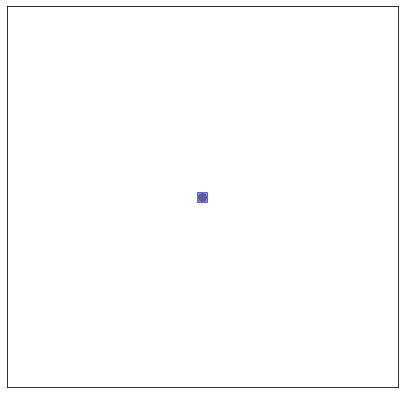

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(7,7))

G=nx.DiGraph()
nx.draw_networkx(G,pos=C,nodelist=[i for i in C if i != "depot"],node_color="y",node_size=50,with_labels=True,edge_color="k",width=1)
nx.draw_networkx(G,pos=C,nodelist=["depot"],node_color="blue",node_shape='s',alpha=0.5,node_size=100,with_labels=True,edge_color="k",width=1)

plt.show()

In [15]:
# 距離関数の定義
def Distance(t1,t2):
    return ((t1[0]-t2[0])**2+(t1[1]-t2[1])**2)**(0.5)

# ソルバーの読み込み
import sys
sys.path.append('..')

#from vrplib.vrp_d_1m1_t_model import *
import vrplib.vrp_d_1m1_t_model as vrp

# ソルバーの実行
model = vrp.Model("example") # モデルインスタンスの生成

## 客インスタンスの生成
for i in C:
    if i == "depot":
        continue
    model += vrp.Customer(i,demand=demand[i],timewindow=TW[i],servicetime=S[i])

## 車両インスタンスの生成
for k in range(M):
    model += vrp.Vehicle("v"+str(k),capacity=capacities[k])
    
## 枝インスタンスの生成
for i in C:
    for j in C:
        if i!=j:
            dist = time = Distance(C[i],C[j])
            model += vrp.Edge(i,j,dist,time)

In [16]:
## 最適化の実行
obj=model.optimize(IterLimit=100000,TimeLimit=60,Verbose=False,OutputFlag=False)

## 得られた解の表示
print("objective value =",obj)
for v in model.vehiclesL:
    print()
    print(v)
    print(list(map(lambda x:x.name,v.routing[1:-1])))    
    for iv in map(lambda x:x.name,v.routing[1:-1]):
        print(iv)

objective value = 0.0

Vehicle v0: {'capacity': (2,)}
0.0 = {'distance': 0.0, 'freight_1M1': 0.0, 'timecost': 0.0}
['c1']
c1

Vehicle v1: {'capacity': (4,)}
0.0 = {'distance': 0.0, 'freight_1M1': 0.0, 'timecost': 0.0}
['c2', 'c0']
c2
c0

Vehicle v2: {'capacity': (6,)}
0.0 = {'distance': 0.0, 'freight_1M1': 0.0, 'timecost': 0.0}
['c3', 'c4']
c3
c4


## 各車両の巡回路を保存

In [875]:
for v in model.vehiclesL:
    print(f"車両{int(v.name[1:])}\t{tuple(map(lambda x:int(x.name[1:])+1, v.routing[1:-1]))}")
    K[int(v.name[1:])].tour = (0,) + tuple(map(lambda x:int(x.name[1:])+1, v.routing[1:-1]))

車両0	(918,)
車両1	(717,)
車両2	(1,)
車両3	(575,)
車両4	(56,)
車両5	(8,)
車両6	(169,)
車両7	(864, 709, 1002)
車両8	(986,)
車両9	(208,)
車両10	(973,)
車両11	(304,)
車両12	(689,)
車両13	(265, 999, 980, 529, 1016, 364, 143, 67, 409)
車両14	(511,)
車両15	(585,)
車両16	(989,)
車両17	(693, 222, 754, 337, 968, 419)
車両18	(888, 978, 576, 375, 501, 213, 730)
車両19	(173,)
車両20	(824,)
車両21	(793,)
車両22	(655, 578, 982, 890, 117, 514, 355)
車両23	(473,)
車両24	(396,)
車両25	(649, 572, 544, 345, 741, 629)
車両26	(600,)
車両27	(411, 272, 418, 703, 269, 38)
車両28	(318,)
車両29	(81,)
車両30	(745, 454, 554, 171, 33, 273)
車両31	(613, 509)
車両32	(456,)
車両33	(462, 964, 437, 652, 670, 735)
車両34	(804,)
車両35	(1022,)
車両36	(746,)
車両37	(697, 723)
車両38	(724,)
車両39	(303,)
車両40	(448, 698, 594)
車両41	(229,)
車両42	(472,)
車両43	(267,)
車両44	(436,)
車両45	(568,)
車両46	(669,)
車両47	(823, 442)
車両48	(416,)
車両49	(489,)
車両50	(638,)
車両51	(149,)
車両52	(377,)
車両53	(845, 293, 900, 474)
車両54	(843,)
車両55	(251, 154, 711, 990, 541, 1012)
車両56	(394, 842, 111, 631, 500, 184, 832, 203, 848)
車両57	(5

In [876]:
for k in range(len(K)):
    print(f"車両{k}\t{K[k].tour}")

車両0	(0, 918)
車両1	(0, 717)
車両2	(0, 1)
車両3	(0, 575)
車両4	(0, 56)
車両5	(0, 8)
車両6	(0, 169)
車両7	(0, 864, 709, 1002)
車両8	(0, 986)
車両9	(0, 208)
車両10	(0, 973)
車両11	(0, 304)
車両12	(0, 689)
車両13	(0, 265, 999, 980, 529, 1016, 364, 143, 67, 409)
車両14	(0, 511)
車両15	(0, 585)
車両16	(0, 989)
車両17	(0, 693, 222, 754, 337, 968, 419)
車両18	(0, 888, 978, 576, 375, 501, 213, 730)
車両19	(0, 173)
車両20	(0, 824)
車両21	(0, 793)
車両22	(0, 655, 578, 982, 890, 117, 514, 355)
車両23	(0, 473)
車両24	(0, 396)
車両25	(0, 649, 572, 544, 345, 741, 629)
車両26	(0, 600)
車両27	(0, 411, 272, 418, 703, 269, 38)
車両28	(0, 318)
車両29	(0, 81)
車両30	(0, 745, 454, 554, 171, 33, 273)
車両31	(0, 613, 509)
車両32	(0, 456)
車両33	(0, 462, 964, 437, 652, 670, 735)
車両34	(0, 804)
車両35	(0, 1022)
車両36	(0, 746)
車両37	(0, 697, 723)
車両38	(0, 724)
車両39	(0, 303)
車両40	(0, 448, 698, 594)
車両41	(0, 229)
車両42	(0, 472)
車両43	(0, 267)
車両44	(0, 436)
車両45	(0, 568)
車両46	(0, 669)
車両47	(0, 823, 442)
車両48	(0, 416)
車両49	(0, 489)
車両50	(0, 638)
車両51	(0, 149)
車両52	(0, 377)
車両53	(0, 845, 

## 巡回路を評価（各顧客の出発時刻を決める）  
どのくらい時間がかかるか調べる

In [877]:
def distance(i, j, V):
    x0 = V[i].coordinate.x
    y0 = V[i].coordinate.y
    x1 = V[j].coordinate.x
    y1 = V[j].coordinate.y
    return ((x0-x1)**2 + (y0-y1)**2)**(1/2)

In [878]:
import gurobipy as gp

# インスタンスの生成
m = gp.Model("LP_for_VRP_small")

# 定数を設定
#V, K = ex() #ex_small()

# 変数を設定
"""
x_ik : 顧客iへ車両kが到着する時刻を表す変数
y_i : 車両が顧客iに到着する時刻が、顧客iの時間枠に対して、どの程度違反しているかを表す変数
z_i : 車両が顧客iに到着する時刻が、顧客iの時間枠に対して、どの程度嬉しいかを表す変数
"""
x = {(i,k):m.addVar(vtype=gp.GRB.CONTINUOUS, name=f"x({i},{k})") for k in K for i in K[k].tour}
y = {i:m.addVar(vtype=gp.GRB.CONTINUOUS, name=f"y({i})") for i in V}
#z = {i:m.addVar(vtype=gp.GRB.CONTINUOUS, name=f"z({i})") for i in V if i != 0}

m.update()

In [879]:
# 目的関数を設定
## 各顧客iの到着時刻x_ikと顧客iの時間枠を元に計算した違反料の和を最小化する
m.setObjective(gp.quicksum(V[i].penalty*y[i] for i in V), sense=gp.GRB.MINIMIZE)
#m.setObjectiveN(gp.quicksum(V[i].penalty*y[i] for i in V), 1)
#m.setObjectiveN(gp.quicksum(-1*z[i] for i in V if i != 0), 2)
"""
m.setObjectiveN(gp.quicksum(gp.quicksum(V[i].reward.val(x[i,k]) for i in K[k].tour) for k in K))
V[i].reward.val(x[i,k]) for k in K for i in K[k].tour
"""

'\nm.setObjectiveN(gp.quicksum(gp.quicksum(V[i].reward.val(x[i,k]) for i in K[k].tour) for k in K))\nV[i].reward.val(x[i,k]) for k in K for i in K[k].tour\n'

In [880]:
# 制約条件を設定
## 時間枠の違反に関する制約
for k in K:
    for i in K[k].tour:
        #m.addConstr(y[i,k] == penalty(i, x[i,k], V))
        m.addConstr(V[i].tw.e-y[i] <= x[i,k])
        m.addConstr(x[i,k] <= V[i].tw.l+y[i])
## 時間枠順守の嬉しさに関する制約
"""for k in K:
    for i in K[k].tour:
        if i != 0:
            #m.addConstr(V[i].reward.val(x[i,k]) <= z[i])
            #if V[i].tw.e <= x[i,k] <= V[i].tw.l:
            m.addConstr(V[i].reward.interception-(x[i,k]-V[i].tw.e)*V[i].reward.slope <= z[i])"""
## 任意の車両の巡回路内における、各顧客への到着時刻の先行、後行に関する制約
for k in K:
    for idx_p, i_p in enumerate(K[k].tour):
        for idx_f, i_f in enumerate(K[k].tour):
            if idx_p < idx_f:
                #print(f"顧客{i_p}は顧客{i_f}よりも先に訪れられる")
                m.addConstr(x[i_p, k] + distance(i_p, i_f, V) <= x[i_f, k])
## 全ての車両はデポを出発し、サービス時間内に到着するという制約
for k in K:
    m.addConstr(0 <= x[0,k])

In [881]:
for k in range(M):
    print(K[k].tour)

(0, 918)
(0, 717)
(0, 1)
(0, 575)
(0, 56)
(0, 8)
(0, 169)
(0, 864, 709, 1002)
(0, 986)
(0, 208)
(0, 973)
(0, 304)
(0, 689)
(0, 265, 999, 980, 529, 1016, 364, 143, 67, 409)
(0, 511)
(0, 585)
(0, 989)
(0, 693, 222, 754, 337, 968, 419)
(0, 888, 978, 576, 375, 501, 213, 730)
(0, 173)
(0, 824)
(0, 793)
(0, 655, 578, 982, 890, 117, 514, 355)
(0, 473)
(0, 396)
(0, 649, 572, 544, 345, 741, 629)
(0, 600)
(0, 411, 272, 418, 703, 269, 38)
(0, 318)
(0, 81)
(0, 745, 454, 554, 171, 33, 273)
(0, 613, 509)
(0, 456)
(0, 462, 964, 437, 652, 670, 735)
(0, 804)
(0, 1022)
(0, 746)
(0, 697, 723)
(0, 724)
(0, 303)
(0, 448, 698, 594)
(0, 229)
(0, 472)
(0, 267)
(0, 436)
(0, 568)
(0, 669)
(0, 823, 442)
(0, 416)
(0, 489)
(0, 638)
(0, 149)
(0, 377)
(0, 845, 293, 900, 474)
(0, 843)
(0, 251, 154, 711, 990, 541, 1012)
(0, 394, 842, 111, 631, 500, 184, 832, 203, 848)
(0, 523)
(0, 687, 846, 467, 351, 936, 284, 880)
(0, 747, 959)
(0, 508, 628, 579, 587, 946)
(0, 395)
(0, 36)
(0, 366)
(0, 237)
(0, 317)
(0, 810)
(0, 162)

In [884]:
import time

# 時間計測スタート
start = time.time()

# 最適化
m.optimize()

# 時間計測ストップ
elapsed_time = time.time() - start
                
# 解の表示
if m.Status == gp.GRB.OPTIMAL:
    for k in K:
        for i in K[k].tour:
            print(f"車両{k}が顧客{i}に到着する時刻は、{x[i, k].X}")
    print("最適値 : ", m.ObjVal)
    
print('\033[31m'+f"実時間\t{elapsed_time}"+'\033[0m')

Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (mac64)
Optimize a model with 6252 rows, 2578 columns and 11975 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+04]

Solved in 691 iterations and 0.01 seconds
Optimal objective  0.000000000e+00
車両0が顧客0に到着する時刻は、0.0
車両0が顧客918に到着する時刻は、9388.43974374493
車両1が顧客0に到着する時刻は、0.0
車両1が顧客717に到着する時刻は、3780.496489664625
車両2が顧客0に到着する時刻は、0.0
車両2が顧客1に到着する時刻は、7761.453086108697
車両3が顧客0に到着する時刻は、0.0
車両3が顧客575に到着する時刻は、2546.2610949120008
車両4が顧客0に到着する時刻は、0.0
車両4が顧客56に到着する時刻は、9024.272541821352
車両5が顧客0に到着する時刻は、0.0
車両5が顧客8に到着する時刻は、7235.18883703695
車両6が顧客0に到着する時刻は、0.0
車両6が顧客169に到着する時刻は、2337.2747825410843
車両7が顧客0に到着する時刻は、0.0
車両7が顧客864に到着する時刻は、146.17015361439977
車両7が顧客709に到着する時刻は、1590.9918274506867
車両7が顧客1002に到着する時刻は、9515.012059939325
車両8が顧客0に到着する時刻は、0.0
車両8が顧客986に到着する時刻は、4921.763269173738
車両9が顧客0に到着する時刻は、0.0
車両9が顧客208に到着する時刻は、8826.361691715456
車両10が顧客0に到着す

車両426が顧客996に到着する時刻は、1335.3229653075005
車両427が顧客0に到着する時刻は、0.0
車両427が顧客12に到着する時刻は、9725.592301896915
車両428が顧客0に到着する時刻は、0.0
車両428が顧客248に到着する時刻は、9889.412739661246
車両429が顧客0に到着する時刻は、0.0
車両429が顧客458に到着する時刻は、9472.883407896827
車両430が顧客0に到着する時刻は、0.0
車両430が顧客570に到着する時刻は、9518.09583885548
車両431が顧客0に到着する時刻は、0.0
車両431が顧客583に到着する時刻は、6751.747722375079
車両432が顧客0に到着する時刻は、0.0
車両432が顧客276に到着する時刻は、8860.313405232902
車両433が顧客0に到着する時刻は、0.0
車両433が顧客297に到着する時刻は、6315.0098757685
車両434が顧客0に到着する時刻は、0.0
車両434が顧客187に到着する時刻は、3935.6403055127316
車両435が顧客0に到着する時刻は、0.0
車両435が顧客20に到着する時刻は、8657.147839504552
車両436が顧客0に到着する時刻は、0.0
車両436が顧客955に到着する時刻は、7105.261983764941
車両436が顧客814に到着する時刻は、7125.206918284536
車両436が顧客869に到着する時刻は、7134.757002549971
車両436が顧客277に到着する時刻は、7150.039077614542
車両436が顧客177に到着する時刻は、8473.470584351464
車両437が顧客0に到着する時刻は、0.0
車両437が顧客828に到着する時刻は、5940.508386299591
車両437が顧客7に到着する時刻は、8224.557765425869
車両437が顧客230に到着する時刻は、8241.943800198373
車両437が顧客459に到着する時刻は、9239.914326964998
車両438が顧客0に到着する時刻は、0.0
車両438が顧客726に到着する時刻は